In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
from __future__ import division
from __future__ import print_function
from scipy.optimize import curve_fit
import os

[This notebook](http://nbviewer.ipython.org/gist/keflavich/4042018) has a good tutorial on curve fitting. Note the use of np.polyfit(), np.polyval(), and curve_fit() from scipy.optimize.

In [9]:
data1 = np.array([[   0.3,    54.5,     9.49],
 [   0.35,  105.7,    15.94],
 [   0.4,   127.62,   13.19],
 [   0.45,  185.95,   15.6 ],
 [   0.5,   197.56,   16.36]])

In [10]:
def membthickfunc(t,a,b):
    return a*np.log(t/b)

In [11]:
fitpars, covmat = curve_fit(membthickfunc, data1[:,0], data1[:,1])#, p0=[0.01,0.24])
std_devs = np.sqrt(covmat.diagonal())
print('fit params:', fitpars)
print('    stdevs:', std_devs)

fit params: [  2.88233065e+02   2.47048025e-01]
    stdevs: [  2.71746517e+01   1.16362149e-02]


/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from IPython.kernel.zmq import kernelapp as app


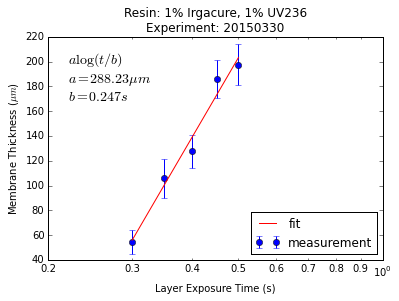

In [12]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.errorbar(data1[:,0], data1[:,1], data1[:,2], linestyle='None', marker='o', label='measurement')
ax.plot(data1[:,0], membthickfunc(data1[:,0],*fitpars), 'r-', label='fit')
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
ax.set_xlim(0.2,1.0)
ax.legend(loc=4)
fittext = '$a \log(t/b)$\n$a={:.2f} \mu m$\n$b={:.3f}s$'.format(fitpars[0],fitpars[1])
ax.text(0.22,170,fittext,fontsize=14)
ax.set_xlabel('Layer Exposure Time (s)')
ax.set_ylabel('Membrane Thickness ($\mu m$)')
ax.set_title('Resin: 1% Irgacure, 1% UV236\nExperiment: 20150330');
#fig.savefig(makename('G_150330_'));